# Tarea 2
### Ejercicio 1

## Jonathan Alexis Urrutia Anguiano 41401102-5

In [1]:
from pylab import *
%matplotlib inline

Deseamos encontrar todas las raíces de una función en un intervalo dada. Primero se utilizará un método parecido al de beisección visto en clase para encontrar subconjuntos de longitud $h$ del intervalo en donde se encuentren raíces. Se verá si el producto de los extremos de cada intervalo es positivo o negativo; en caso de ser negativo significa que hay una raíz en dicho intervalo, por lo que se guardará el valor de uno de lo lados del subintervalo serán. Después se aplicará el método de Newton-Raphson con un error de $e-8$ para encontrar el valor de la raíz. Se probará el método encontrando las raíces de la función 

$$
y(x) = \cos x + \frac{6}{5}\sin x^2,\;\; \;\;\; x\in[0,2\pi]
$$


In [2]:
def prueba(x):
    return cos(x) + (6/5)*sin(x*x)

Aquí definimos el método para encontrar pintos cercanos a las raíces

In [3]:
def pseudoraices(func, intervalo, h=1e-2):
    tiempo = arange(intervalo[0],intervalo[1]+h,h)
    roots = []
    
    for i in xrange(len(tiempo)-1):
        f_l, f_r = func(tiempo[i]) , func(tiempo[i+1])
        if f_l*f_r<=0:
            roots.append(tiempo[i])
    return roots   

Esto es la derivada numérica con un error de cuarto orden y el método de Newton-Raphson

In [4]:
def deriv_num(func,x_0, h=1e-4):
    return (-func(x_0+2*h)+8*func(x_0+h)-8*func(x_0-h)+func(x_0-2*h))/(12.*h)

In [5]:
def Newton_Raphson(func,x_0, err = 1e-8):
    while abs(func(x_0)) >= err:
        root = x_0 - func(x_0)/deriv_num(func,x_0)
        x_0 = root
    return root

Finalmente, podemos encontrar las raíces de de la función. 

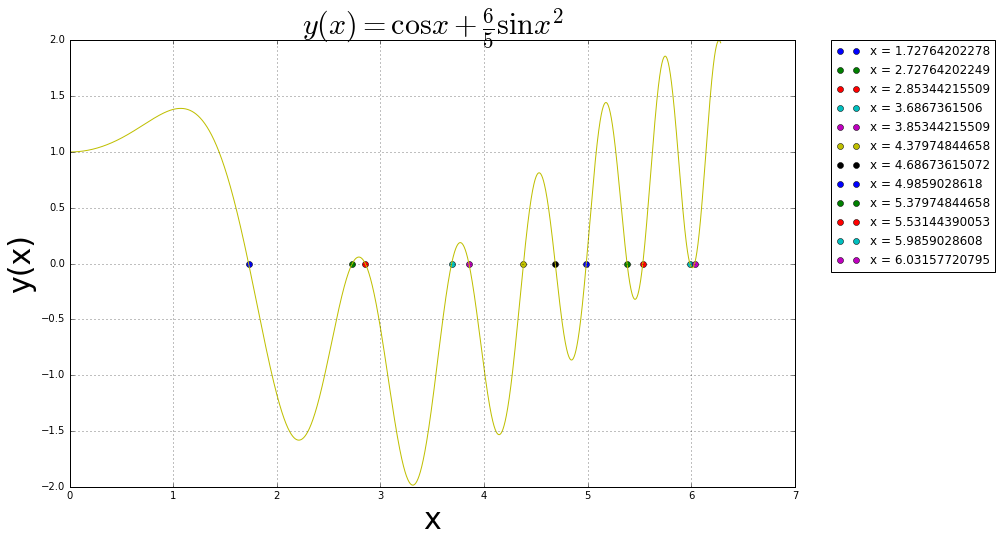

In [6]:
fig, ax = plt.subplots(figsize=(13, 8))
grid(True)
title(r'$y(x) = \cos x + \frac{6}{5}\sin x^2$',fontsize = 30),xlabel('x',fontsize=30),ylabel('y(x)',fontsize = 30)

candidatos = pseudoraices(prueba,[0,2*pi])
for i in xrange(len(candidatos)):
    root = Newton_Raphson(prueba,candidatos[i])
    plot([root],[0],'o', label = 'x = '+str(root))
    
time = arange(0,2*pi,.00001)
plot(time,prueba(time))
ax.legend(bbox_to_anchor=(1.05, 1.0), loc=2, borderaxespad=0.)
show()

Notemos que el error de la raíz se de $10^{-8}$ pero para encontrarlas se hizo primero un barrido de paso $h= 10^{-2}$. Aunque no se tuvo problemas, en  el caso en el que el primer barrido no capturase todas las raíces, este paso debe hacerse más chico.